In [1]:
'''Inspiration
Understanding what content is available in different countries
Identifying similar content by matching text-based features
Network analysis of Actors / Directors and find interesting insights
Is Netflix has increasingly focusing on TV rather than movies in recent years.'''

In [48]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
netf=pd.read_csv("netflix_19.csv")
netf.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


data investigation

In [9]:
print('netflix movies and shows: ',netf.shape[0])
print('netflix variables(columns):',netf.shape[1])

netflix movies and shows:  5837
netflix variables(columns): 12


In [11]:
print('netflix dateset columns: \n')
print(netf.columns)

netflix dateset columns: 

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')


In [12]:
print('data-type of each column: \n')
print(netf.dtypes)

data-type of each column: 

show_id          int64
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
dtype: object


In [16]:
print('missing rows in each column :')
c=netf.isnull().sum()
c[c>0]

missing rows in each column :


director      1901
cast           556
country        427
date_added     642
rating          10
dtype: int64

Data cleaning

In [22]:
dups=netf.duplicated(['title','country','type','release_year'])
netf[dups]

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1134,80175351,Kakegurui,NaN,"Saori Hayami, Minami Tanaka, Tatsuya Tokutake,...",Japan,NaN,2019,TV-14,2 Seasons,"Anime Series, International TV Shows, TV Thril...",High roller Yumeko Jabami plans to clean house...,TV Show
1741,81072516,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...,Movie


In [25]:
netf=netf.drop_duplicates(['title','country','type','release_year'])
netf.head(2)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie


In [34]:
netf['cast']=netf['cast'].replace(np.nan,'Unknown')
def cast_counter(cast):
    if cast=='Unknown':
        return 0
    else:
        lst=cast.split(', ')
        length=len(lst)
        return length
netf['number_of_cast']=netf['cast'].apply(cast_counter)
netf['cast']=netf['cast'].replace('Unknown',np.nan)

In [36]:
netf=netf.reset_index()

In [38]:
netf['rating']=netf['rating'].fillna(netf['rating'].mode()[0])

In [40]:
netf['rating'].mode()

0    TV-MA
dtype: object

In [41]:
netf['date_added']=netf['date_added'].fillna('January 1, {}'
                                         .format(str(netf['release_year'].mode()[0])))

In [42]:
netf['date_added']

0       November 30, 2019
1       November 30, 2019
2       November 30, 2019
3       November 29, 2019
4         January 1, 2018
              ...        
5830     November 1, 2010
5831    November 18, 2009
5832          May 5, 2009
5833     February 4, 2008
5834      January 1, 2008
Name: date_added, Length: 5835, dtype: object

In [46]:
for i,j in zip(netf['country'].values,netf.index):
    if i==np.nan:
        if ('Anime' in netf.loc[j,'listed_in']) or ('anime' in netf.loc[j,'listed_in']):
                netf.loc[j,'country']='Japan'
        else:
            continue
    else:
        continue

In [50]:
import re
months={
    'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,
    'September':9,'October':10,'November':11,'December':12
}
date_lst=[]
for i in netf['date_added'].values:
    str1=re.findall('([a-zA-Z]+)\s[0-9]+\,\s[0-9]+',i)
    str2=re.findall('[a-zA-Z]+\s([0-9]+)\,\s[0-9]+',i)
    str3=re.findall('[a-zA-Z]+\s[0-9]+\,\s([0-9]+)',i)
    date='{}-{}-{}'.format(str3[0],months[str1[0]],str2[0])
    date_lst.append(date)

In [53]:
netf['date_added_cleaned']=date_lst

In [54]:
netf=netf.drop('date_added',axis=1)

In [55]:
netf['date_added_cleaned']=netf['date_added_cleaned'].astype('datetime64[ns]')

Exploratory Data Analysis

In [58]:
for i in netf.index:
    if netf.loc[i,'rating']=='UR':
        netf.loc[i,'rating']='NR'

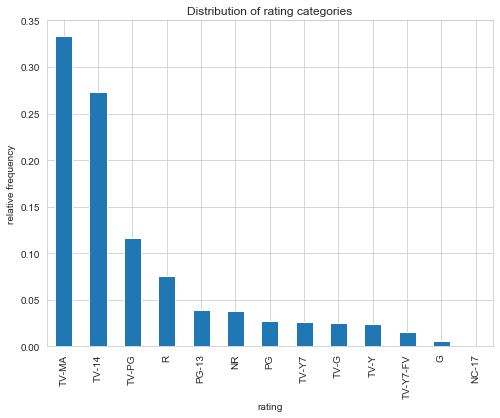

In [66]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
netf['rating'].value_counts(normalize=True).plot.bar()
plt.title('Distribution of rating categories')
plt.xlabel('rating')
plt.ylabel('relative frequency')
plt.show()

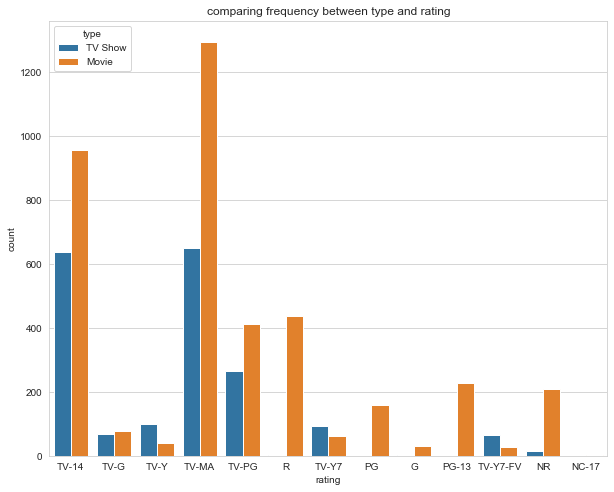

In [67]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netf)
plt.title('comparing frequency between type and rating')
plt.show()

In [68]:
netf['country'].value_counts().sort_values(ascending=False)

United States                                 1907
India                                          696
United Kingdom                                 336
Japan                                          167
Canada                                         139
                                              ... 
France, Netherlands, South Africa, Finland       1
China, United States                             1
United States, China, Hong Kong                  1
Mexico, Spain                                    1
United States, Senegal                           1
Name: country, Length: 527, dtype: int64

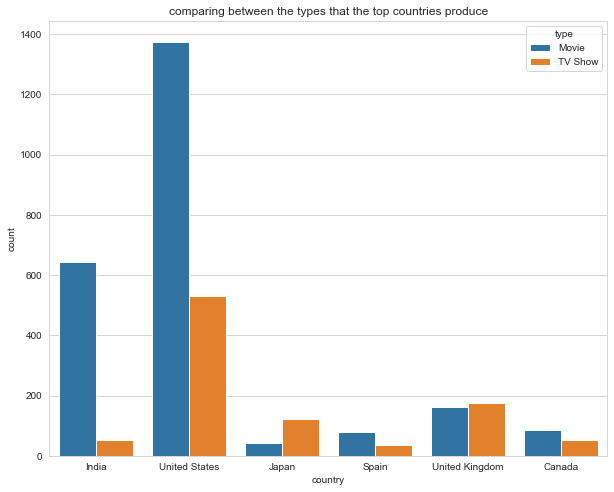

In [69]:
top_productive_countries=netf[(netf['country']=='United States')|(netf['country']=='India')|
                            (netf['country']=='United Kingdom')|(netf['country']=='Japan')|
                             (netf['country']=='Canada')|(netf['country']=='Spain')]
plt.figure(figsize=(10,8))
sns.countplot(x='country',hue='type',data=top_productive_countries)
plt.title('comparing between the types that the top countries produce')
plt.show()

In [74]:
for i in top_productive_countries['country'].unique():
    print(i)
    print(top_productive_countries[top_productive_countries['country']==i]
          ['rating'].value_counts(normalize=True)*100)
    print('-'* 35)

India
TV-14       53.160920
TV-MA       23.419540
TV-PG       17.097701
NR           2.873563
TV-G         1.005747
TV-Y7        0.718391
PG-13        0.574713
PG           0.431034
R            0.287356
TV-Y7-FV     0.287356
TV-Y         0.143678
Name: rating, dtype: float64
-----------------------------------
United States
TV-MA       31.515469
TV-14       17.409544
R           12.165705
TV-PG       10.854746
PG-13        7.079182
PG           4.876770
NR           4.824331
TV-G         3.198741
TV-Y7        2.621919
TV-Y7-FV     2.097535
TV-Y         2.045097
G            1.258521
NC-17        0.052438
Name: rating, dtype: float64
-----------------------------------
Japan
TV-14       46.107784
TV-MA       25.748503
TV-PG       10.179641
NR           7.185629
TV-Y7        5.389222
PG-13        1.796407
TV-Y7-FV     1.197605
TV-Y         1.197605
PG           0.598802
TV-G         0.598802
Name: rating, dtype: float64
-----------------------------------
Spain
TV-MA    64.601770
TV-14 

In [75]:
netf['year_added']=netf['date_added_cleaned'].dt.year

In [77]:
netf['type'].value_counts(normalize=True)

Movie      67.489289
TV Show    32.510711
Name: type, dtype: float64

In [78]:
netf.groupby('year_added')['type'].value_counts(normalize=True)*100

year_added  type   
2008        Movie       50.000000
            TV Show     50.000000
2009        Movie      100.000000
2010        Movie      100.000000
2011        Movie      100.000000
2012        Movie       57.142857
            TV Show     42.857143
2013        Movie       66.666667
            TV Show     33.333333
2014        Movie      100.000000
2015        Movie       78.378378
            TV Show     21.621622
2016        Movie       64.077670
            TV Show     35.922330
2017        Movie       77.111486
            TV Show     22.888514
2018        Movie       56.872247
            TV Show     43.127753
2019        Movie       74.158523
            TV Show     25.841477
Name: type, dtype: float64

In [79]:
dups=netf.duplicated(['title'])
netf[dups]['title']

212                                      Drive
511                                     Tunnel
1243                                 Supergirl
1286                                 Limitless
1706                                    Shadow
2360                               Oh My Ghost
2410                                  Love O2O
2765                                    Bleach
2801                                   One Day
2871                             The Innocents
2932                          The Birth Reborn
3048                               Oh My Ghost
3212                               Us and Them
3433                                      Troy
3483                                 Locked Up
3583                                      Love
3585                              The Outsider
3591                                     Benji
3658                                      Solo
3669                               The Silence
3670                               The Silence
3882         

In [80]:
for i in netf[dups]['title'].values:
    print(netf[netf['title']==i][['title','type','release_year','country']])
    print('-'*70)

     title   type  release_year        country
101  Drive  Movie          2011  United States
212  Drive  Movie          2019          India
----------------------------------------------------------------------
       title     type  release_year      country
303   Tunnel  TV Show          2019          NaN
511   Tunnel  TV Show          2017  South Korea
4659  Tunnel    Movie          2016  South Korea
----------------------------------------------------------------------
          title     type  release_year                        country
492   Supergirl    Movie          1984  United Kingdom, United States
1243  Supergirl  TV Show          2019                  United States
----------------------------------------------------------------------
          title     type  release_year        country
474   Limitless    Movie          2017          India
1286  Limitless    Movie          2011  United States
5536  Limitless  TV Show          2016  United States
------------------------

         title     type  release_year    country
4012  The Oath    Movie          2016    Iceland
4589  The Oath  TV Show          2011  Singapore
----------------------------------------------------------------------
       title     type  release_year      country
303   Tunnel  TV Show          2019          NaN
511   Tunnel  TV Show          2017  South Korea
4659  Tunnel    Movie          2016  South Korea
----------------------------------------------------------------------
       title   type  release_year country
3490  Prince  Movie          2010   India
4689  Prince  Movie          1969   India
----------------------------------------------------------------------
                title     type  release_year   country
1265  Rosario Tijeras  TV Show          2018    Mexico
4857  Rosario Tijeras  TV Show          2010  Colombia
----------------------------------------------------------------------
              title   type  release_year           country
2697  We Are Family  Mo

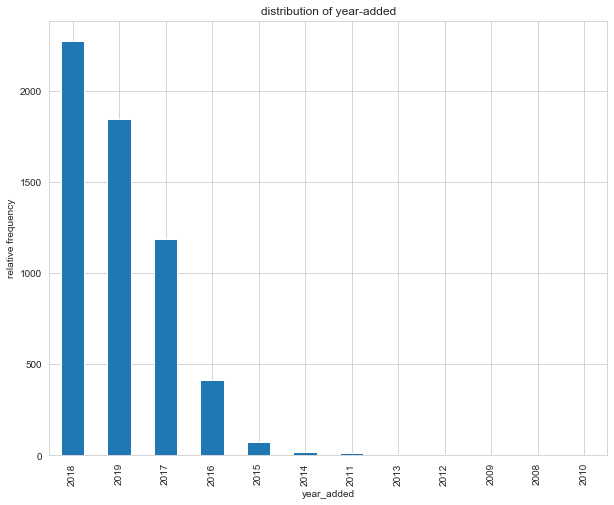

In [81]:
plt.figure(figsize=(10,8))
netf['year_added'].value_counts().plot.bar()
plt.title('distribution of year-added')
plt.ylabel('relative frequency')
plt.xlabel('year_added')
plt.show()

In [82]:
counts=0
for i,j in zip(netf['release_year'].values,netf['year_added'].values):
    if i!=j:
        counts+=1
print('number of contents that its release year differ from the year added to netflix are ',str(counts))

number of contents that its release year differ from the year added to netflix are  3971


In [84]:
netf.head(1)

,index,title,director,cast,country,release_year,rating,duration,listed_in,description,type,number_of_cast,date_added_cleaned,year_added
0,0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,8,2019-11-30,2019


In [85]:
netf.memory_usage()

Index                    64
index                 46680
title                 23340
director              23340
cast                  23340
country               23340
release_year          46680
rating                23340
duration              23340
listed_in             23340
description           23340
type                  23340
number_of_cast        46680
date_added_cleaned    46680
year_added            46680
dtype: int64

In [93]:
# astype() to use this fun first calc dtype of particular column then convert to astype

TypeError: 'Series' object is not callable